In [1]:
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(4873)

In [2]:
data = pd.read_csv('./data/simple_example.csv')
Y = data[['y']]
X = data[['x']]
# 加入新的随机变量，此变量的系数应为0
X['z'] = np.random.randint(2, size=20)
X = sm.add_constant(X)

In [3]:
ln_alphas = np.linspace(-6, -1, 100)
coefs = []
for ln_alpha in ln_alphas:
    # lasso模型的惩罚项并不包括截距项，
    # 我们需要在数据中手动添加截距项变量const
    model = linear_model.Lasso(alpha=np.exp(ln_alpha), fit_intercept=False)
    model.fit(X[['x', 'z', 'const']], Y)
    coefs.append(model.coef_.tolist())
coefs = np.array(coefs)

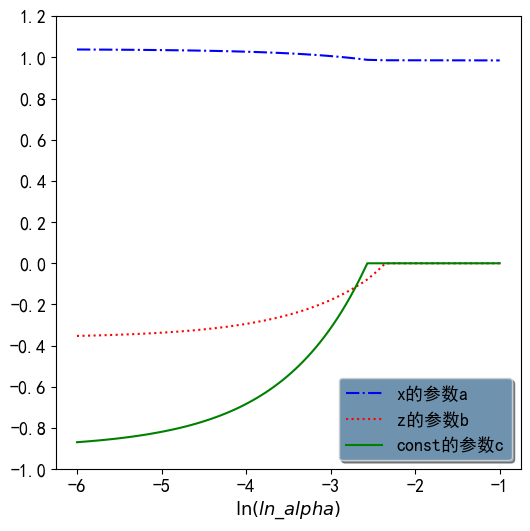

In [4]:
# 为在Matplotlib中显示中文，设置特殊字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 13})
# 创建一个图形框
fig = plt.figure(figsize=(6, 6), dpi=100)
# 在图形框里只画一幅图
ax = fig.add_subplot(111)
ax.plot(ln_alphas, coefs[:, 0], 'b-.', label='x的参数a')
ax.plot(ln_alphas, coefs[:, 1], 'r:', label='z的参数b')
ax.plot(ln_alphas, coefs[:, 2], 'g', label='const的参数c')
# 设置图例的样式
legend = plt.legend(loc=4, shadow=True)
legend.get_frame().set_facecolor("#6F93AE")
ax.set_yticks(np.arange(-1.0, 1.3, 0.2))
ax.set_xlabel("$\ln(ln\_alpha)$")
plt.savefig('linear_ml_reg.png', dpi=200)
plt.show()